# Executive Summary

I've selected a dataset containing socio-economic indicators of various countries. 

The primary objective of my investigation was to create a predictive model that could forecast the severity of inflation based on these factors. Consequently, I constructed three classification models (KNN, SVM, and Logistic Regression). However, the highest accuracy achieved amongst these models was 60%. I assume there could be a degree of complexity in the relationships between the factors and inflation severity that the current models could not capture efficiently.

To further explore groupings within the data, I applied Principal Component Analysis (PCA) followed by clustering techniques. I discovered three distinct clusters within the data. However, when I tried to predict the inflation severity using these clusters, the accuracy decreased to approximately 50%. 

While the clusters offer valuable insights about the structure and relationships within the data, they do not align with the classification of inflation severity. Indicators that are l'kely to contribute most to the differences between the clusters are not the same indicators that are most predictive of inflation severity.

One potential application of PCA to the original dataset in this scenario would be to identify the principal components that explain the majority of the variance in the data. These components do not align directly with the original features but provide an efficient representation of the data. 

Going forward, I could try using different models or tuning the parameters of the current models or increasing the number of relevant features. I could also investigate the clusters more deeply to understand why they're not predicting inflation severity well, and whether the structure they're revealing in the data can be used in other ways.

In [760]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score



In [761]:
df = pd.read_csv('data/Country-data.csv')

In [762]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [764]:
df.describe()
# checking skewness

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0.5, 1.0, 'Box-Cox life_expec')

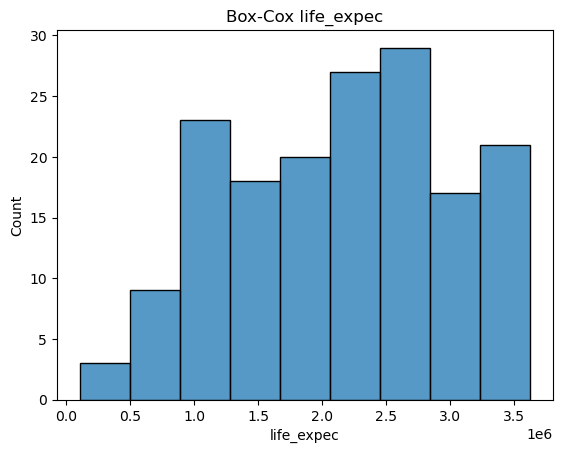

In [765]:
# Transforming life expectancy feature as it is very skewed originally
df['life_expec'], _ = stats.boxcox(df['life_expec'])
sns.histplot(df['life_expec'])
plt.title('Box-Cox life_expec')

In [766]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='gdpp'>

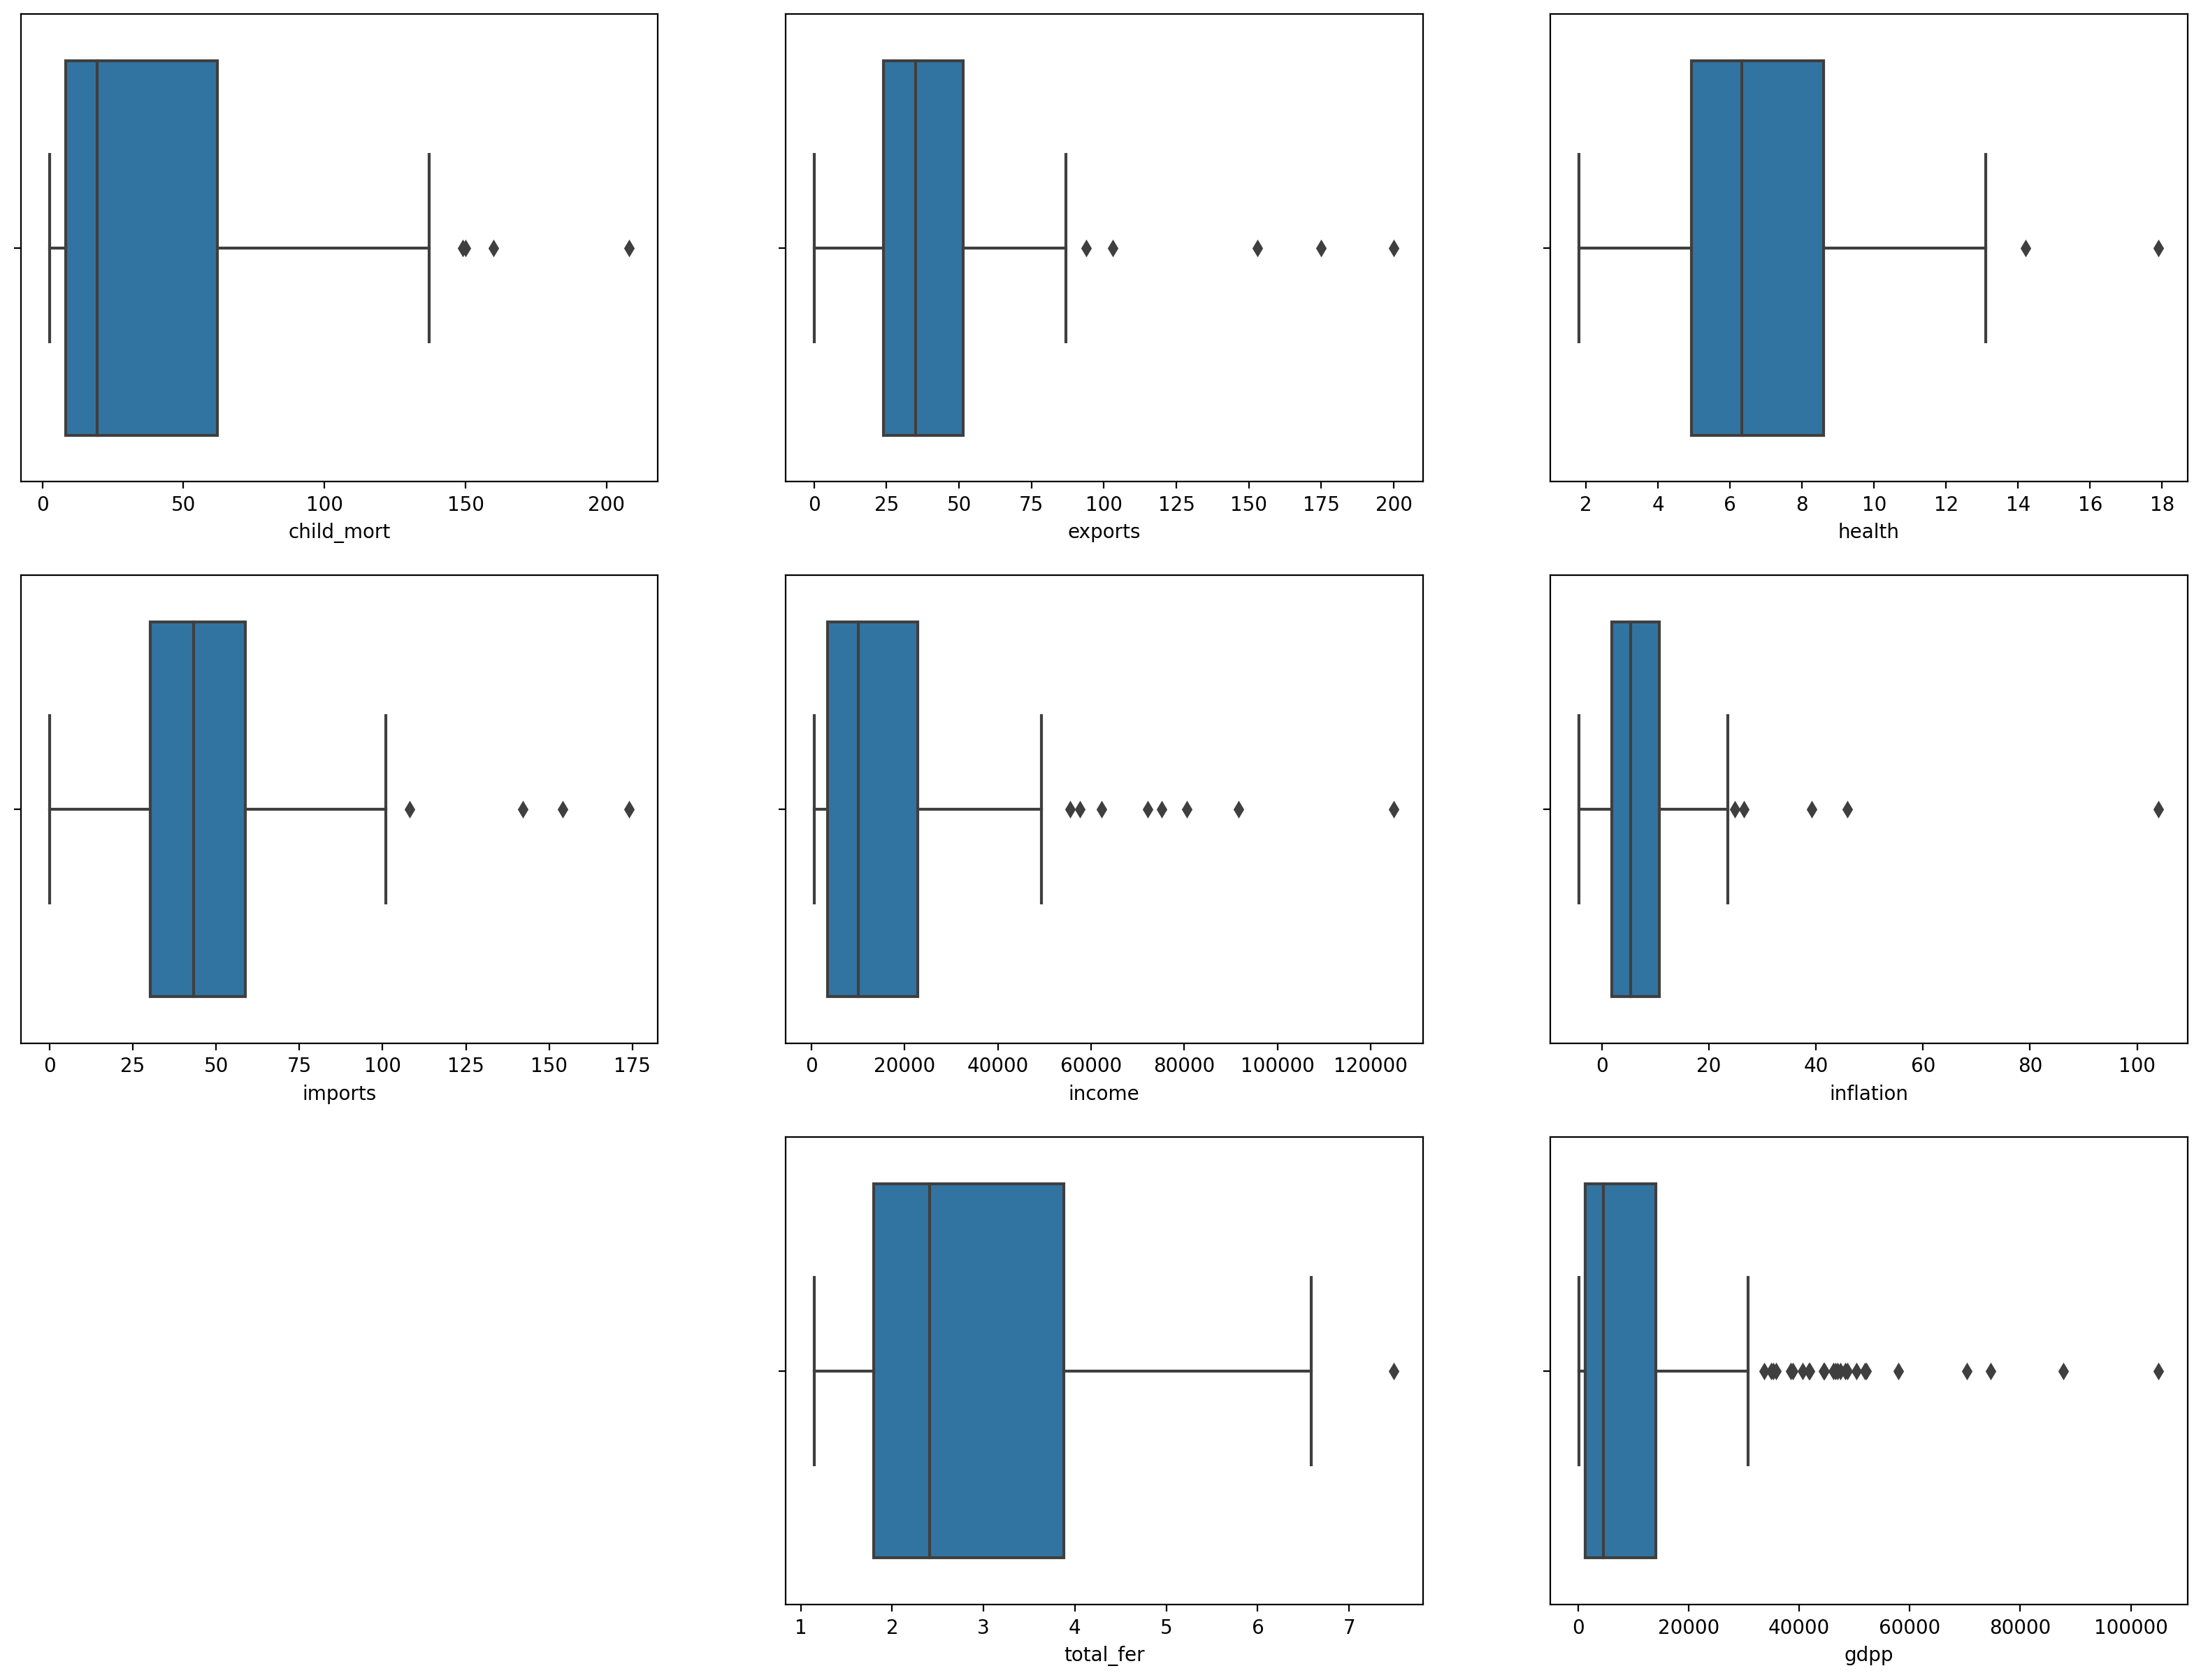

In [767]:
# checking for outliers using box-plots
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = df)

In [768]:
# Getting rid of outliers using z-score
z = np.abs(stats.zscore(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'total_fer', 'gdpp']]))

df1 = df[(z<3).all(axis=1)]

In [769]:
# Creating a new column 'Inflation_Bin' for classification
bin_edges = [-float('inf'), 8, 15, 20, float('inf')]  
bin_labels = [0, 1, 2, 3]  

df1['Inflation_Bin'] = pd.cut(df1['inflation'], bins=bin_edges, labels=bin_labels)

# Performing ordinal encoding
df1['Inflation_Code'] = pd.factorize(df1['Inflation_Bin'], sort=True)[0]
print(df1)


                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation    life_expec  total_fer   gdpp Inflation_Bin  Inflation_Code  
0         9.44  8.586489e+05    

/var/folders/3h/mn_gblgs6jzchz5_k2hy9rdw0000gn/T/ipykernel_970/269911984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inflation_Bin'] = pd.cut(df1['inflation'], bins=bin_edges, labels=bin_labels)
/var/folders/3h/mn_gblgs6jzchz5_k2hy9rdw0000gn/T/ipykernel_970/269911984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inflation_Code'] = pd.factorize(df1['Inflation_Bin'], sort=True)[0]


In [770]:
df = df1
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 166
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country         153 non-null    object  
 1   child_mort      153 non-null    float64 
 2   exports         153 non-null    float64 
 3   health          153 non-null    float64 
 4   imports         153 non-null    float64 
 5   income          153 non-null    int64   
 6   inflation       153 non-null    float64 
 7   life_expec      153 non-null    float64 
 8   total_fer       153 non-null    float64 
 9   gdpp            153 non-null    int64   
 10  Inflation_Bin   153 non-null    category
 11  Inflation_Code  153 non-null    int64   
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 14.7+ KB


In [771]:
class_counts = df['Inflation_Bin'].value_counts()
print(class_counts)

0    101
1     28
2     15
3      9
Name: Inflation_Bin, dtype: int64


In [772]:
df = df.drop('country', axis=1)
df = df.drop("Inflation_Code", axis=1)

X = df.drop('Inflation_Bin',  axis=1)
y = df['Inflation_Bin']

data = pd.concat([X, y], axis=1)

majority_class = data[data['Inflation_Bin'] == 0]
minority_classes = data[data['Inflation_Bin'] != 0]

upsampled_minority = resample(minority_classes, replace=True, n_samples=len(majority_class), random_state=42)

upsampled_data = pd.concat([majority_class, upsampled_minority])

X_resampled = upsampled_data.drop('Inflation_Bin', axis=1)
y_resampled = upsampled_data['Inflation_Bin']

print("Class distribution after oversampling: \n", y_resampled.value_counts())

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Head of training set: \n", X_train_resampled.head())

Class distribution after oversampling: 
 0    101
1     56
2     28
3     17
Name: Inflation_Bin, dtype: int64
Head of training set: 
      child_mort  exports  health  imports  income  inflation    life_expec  \
84         78.9     35.4    4.47     49.3    3980       9.20  1.375854e+06   
56         80.3     23.8    5.69     42.7    1660       4.30  1.517136e+06   
36         88.2     16.5    4.51     51.7    1410       3.87  1.551862e+06   
89         16.6     65.6    3.88     42.1   29600      14.20  2.649548e+06   
149        62.6      2.2    9.12     27.8    1850      26.50  2.058069e+06   

     total_fer   gdpp  
84        3.15   1140  
56        5.71    562  
36        4.75    769  
89        2.41  12100  
149       6.23   3600  


In [773]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test_resampled)

print(f'Logistic Regression Accuracy: {accuracy_score(y_test_resampled, lr_pred)}')


Logistic Regression Accuracy: 0.6097560975609756


/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [774]:
# SVC
svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train_resampled, y_train_resampled)
svc_pred = svc.predict(X_test_resampled)

print(f'SVM Accuracy: {accuracy_score(y_test_resampled, svc_pred)}')



SVM Accuracy: 0.3902439024390244


In [775]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
knn_pred = knn.predict(X_test_resampled)

print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy_score(y_test_resampled, knn_pred)}')


K-Nearest Neighbors Classifier Accuracy: 0.4878048780487805


In [776]:
# Binarizing the output
y_test_binary = np.where(y_test_resampled==0, 0, 1)
lr_pred_binary = np.where(lr_pred==0, 0, 1)

# Function to compute and print metrics for each model
def print_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("\n----------------------------------\n")

# Metrics for each model
print_metrics(y_test_resampled, lr_pred, "Logistic Regression")
print_metrics(y_test_resampled, svc_pred, "SVM")
print_metrics(y_test_resampled, knn_pred, "K-Nearest Neighbors")

models = {
    "Logistic Regression": f1_score(y_test_resampled, lr_pred, average='macro'),
    "SVM": f1_score(y_test_resampled, svc_pred, average='macro'),
    "K-Nearest Neighbors": f1_score(y_test_resampled, knn_pred, average='macro')
}

knn_precision = precision_score(y_test_resampled, knn_pred, average='macro')
knn_recall = recall_score(y_test_resampled, knn_pred, average='macro')
knn_f1 = f1_score(y_test_resampled, knn_pred, average='macro')

print("Model: K-Nearest Neighbors")
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, knn_pred))
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}\n")

best_model = max(models, key=models.get)
print(f"The best model is {best_model} with an F1-score of {models[best_model]:.2f}")

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Confusion Matrix:
[[21  1  0  0]
 [ 5  3  1  0]
 [ 4  0  1  0]
 [ 0  1  4  0]]
Precision: 0.37
Recall: 0.37
F1-score: 0.35

----------------------------------

Model: SVM
Confusion Matrix:
[[13  9  0  0]
 [ 6  3  0  0]
 [ 3  2  0  0]
 [ 0  5  0  0]]
Precision: 0.19
Recall: 0.23
F1-score: 0.20

----------------------------------

Model: K-Nearest Neighbors
Confusion Matrix:
[[15  6  1  0]
 [ 5  3  0  1]
 [ 2  1  2  0]
 [ 4  0  1  0]]
Precision: 0.34
Recall: 0.35
F1-score: 0.35

----------------------------------

Model: K-Nearest Neighbors
Confusion Matrix:
[[15  6  1  0]
 [ 5  3  0  1]
 [ 2  1  2  0]
 [ 4  0  1  0]]
Precision: 0.34
Recall: 0.35
F1-score: 0.35

The best model is Logistic Regression with an F1-score of 0.35


/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Clustering

In [777]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Inflation_Bin
0,90.2,10.0,7.58,44.9,1610,9.44,8.586489e+05,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,2.675524e+06,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,2.701686e+06,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,1.101860e+06,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,2.741279e+06,2.13,12200,0


In [778]:
# Keep the 'Inflation_Bin' column for later use
inflation_bin = df['Inflation_Bin']

# Drop the 'Inflation_Code' column
df = df.drop('Inflation_Bin', axis=1)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)



In [779]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

df['KMeans_Clusters'] = kmeans.labels_

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [780]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(scaled_df)

df['Agglomerative_Clusters'] = agg_cluster.labels_

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [781]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_df)

df['DBSCAN_Clusters'] = dbscan.labels_

In [782]:
print('Inertia for KMeans:', kmeans.inertia_)
print('Silhouette score for KMeans:', silhouette_score(scaled_df, kmeans.labels_))
print('Silhouette score for Agglomerative Clustering:', silhouette_score(scaled_df, agg_cluster.labels_))


Inertia for KMeans: 719.9195692671988
Silhouette score for KMeans: 0.27620983185809833
Silhouette score for Agglomerative Clustering: 0.2592006642919971


# Principal Component Analysis (PCA)

/Users/adri/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


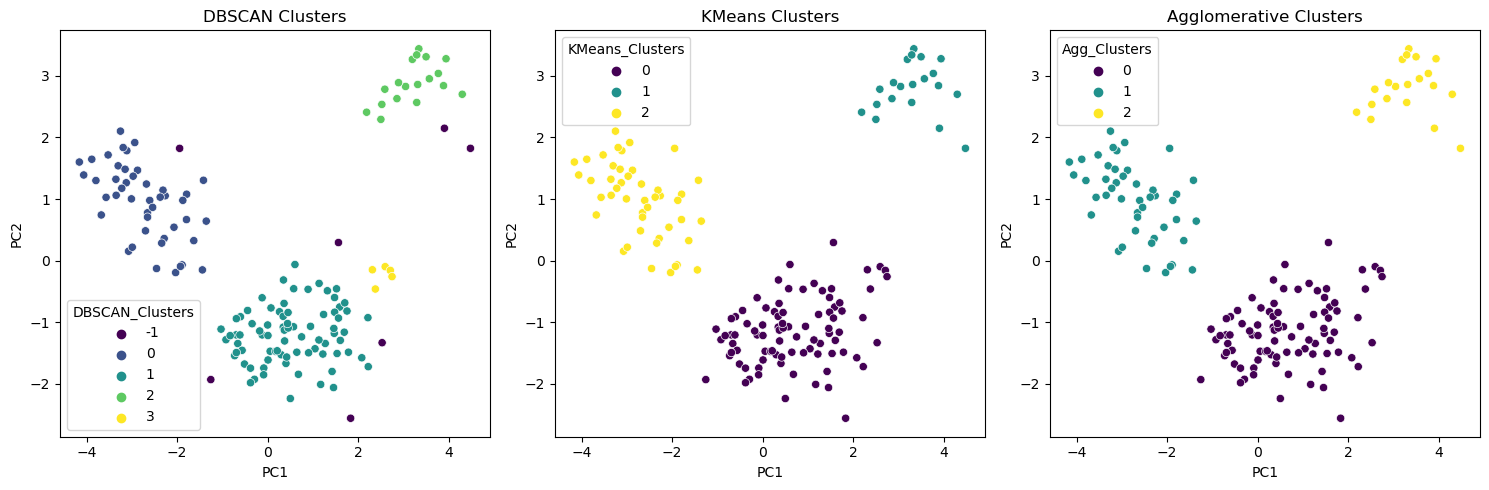

In [783]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Performing PCA or t-SNE for dimensionality reduction
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_df)

PCA_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
dbscan = DBSCAN(eps=0.5, min_samples=5)
kmeans = KMeans(n_clusters=3)
agg = AgglomerativeClustering(n_clusters=3)

# Fitting the clustering methods
PCA_df['DBSCAN_Clusters'] = dbscan.fit_predict(PCA_df)
PCA_df['KMeans_Clusters'] = kmeans.fit_predict(PCA_df)
PCA_df['Agg_Clusters'] = agg.fit_predict(PCA_df)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=PCA_df, x='PC1', y='PC2', hue='DBSCAN_Clusters', palette='viridis')
plt.title('DBSCAN Clusters')

plt.subplot(1, 3, 2)
sns.scatterplot(data=PCA_df, x='PC1', y='PC2', hue='KMeans_Clusters', palette='viridis')
plt.title('KMeans Clusters')

plt.subplot(1, 3, 3)
sns.scatterplot(data=PCA_df, x='PC1', y='PC2', hue='Agg_Clusters', palette='viridis')
plt.title('Agglomerative Clusters')

plt.tight_layout()
plt.show()

In [784]:
# Adding 'Inflation_Bin' column back to PCA_df
PCA_df['Inflation_Bin'] = inflation_bin.values
dbscan = DBSCAN(eps=0.5, min_samples=3)
PCA_df['DBSCAN_Clusters'] = dbscan.fit_predict(PCA_df[['PC1', 'PC2']])  

cluster_inflation_distribution = PCA_df.groupby(['DBSCAN_Clusters', 'Inflation_Bin']).size().reset_index(name='Counts')

print(cluster_inflation_distribution)

    DBSCAN_Clusters Inflation_Bin  Counts
0                -1             0       5
1                -1             1       0
2                -1             2       0
3                -1             3       1
4                 0             0      20
5                 0             1      12
6                 0             2       7
7                 0             3       6
8                 1             0      58
9                 1             1      16
10                1             2       8
11                1             3       2
12                2             0      18
13                2             1       0
14                2             2       0
15                2             3       0
